In [1]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.spatial.distance import euclidean

In [2]:
# Loading in data
spotify_df = pd.read_csv('spotifytoptracks_clean.csv')

# Basic Information

- The data was largely clean with no duplicates, correct data types, no null values, and nothing super out of place. It includes 16 features, 5 of them categorical and 11 of them numerical. 

- I did find outliers in the majority of columns, with the most extreme outliers belonging to instrumentalness. Seeing as my intention was to understand and uncover the differences or similarities that lead a song to being included in this ranking, I decided not to remove any outliers. 

- A full dive into the code and process can be seen in the accompanying EDA. 

## At a glance

### Columns

- rank: Ranking of the track (lower is better).
- artist: Artist or band performing the track.
- album: Album name where the track is featured.
- track_name: Name of the track.
- energy: A measure of intensity and activity, ranging from 0 to 1.
- danceability: A measure of how suitable a track is for dancing, ranging from 0 to 1.
- key: The key the track is in. Integers map to pitches using standard pitch class notation.
- loudness: Overall loudness of the track in decibels (dB).
- acousticness: A confidence measure of whether the track is acoustic, ranging from 0 to 1.
- speechiness: A measure of the presence of spoken words in a track, ranging from 0 to 1.
- instrumentalness: A measure of the likelihood that the track is instrumental, ranging from 0 to 1.
- liveness: A measure of the presence of a live audience in the recording, ranging from 0 to 1.
- valence: A measure of musical positiveness or happiness, ranging from 0 to 1.
- tempo: The tempo of the track in beats per minute (BPM).
- duration_ms: Duration of the track in milliseconds.
- genre: Genre or genres associated with the track.
- duration_min_sec: Duration of the track in minutes and seconds (customly formatted).

### Descriptive Statistics

In [21]:
spotify_df.describe()

,rank,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,14.57738,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,1.00000,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,13.25000,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,25.50000,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,37.75000,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,50.00000,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


# Top Insights

### 1. Danceability and Energy Are Key Factors:

Many top-ranked songs have higher danceability and energy scores. This trend may reflect current listener preferences for upbeat, lively music and could guide music production decisions.

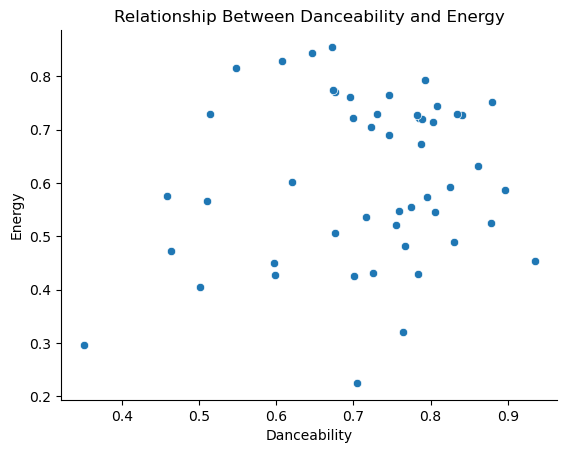

In [12]:
ax = sns.scatterplot(x='danceability', y='energy', data=spotify_df)
plt.title('Relationship Between Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 2. Collaborations Are Fairly Common in Top Tracks:

Collaborations between artists are prevalent among the top 50 tracks. Collaborative efforts may enhance creativity, merge fan bases, and lead to successful outcomes in the charts.

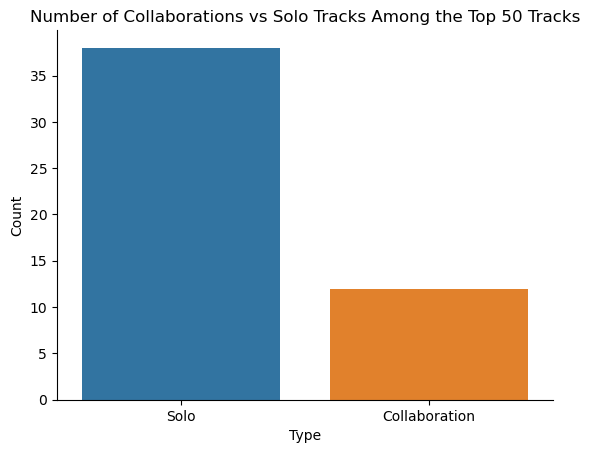

In [20]:
spotify_df['collaboration'] = spotify_df['track_name'].apply(lambda x: 'Collaboration' if 'feat' in x or 'with' in x else 'Solo')

collaboration_counts = spotify_df['collaboration'].value_counts()
ax = sns.barplot(x=collaboration_counts.index, y=collaboration_counts.values)
plt.title('Number of Collaborations vs Solo Tracks Among the Top 50 Tracks')
plt.xlabel('Type')
plt.ylabel('Count')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 3. Genre Influence on Acousticness and Loudness:

Different genres exhibit distinct characteristics in terms of acousticness and loudness. Understanding these genre-specific attributes could help tailor production to the intended audience.

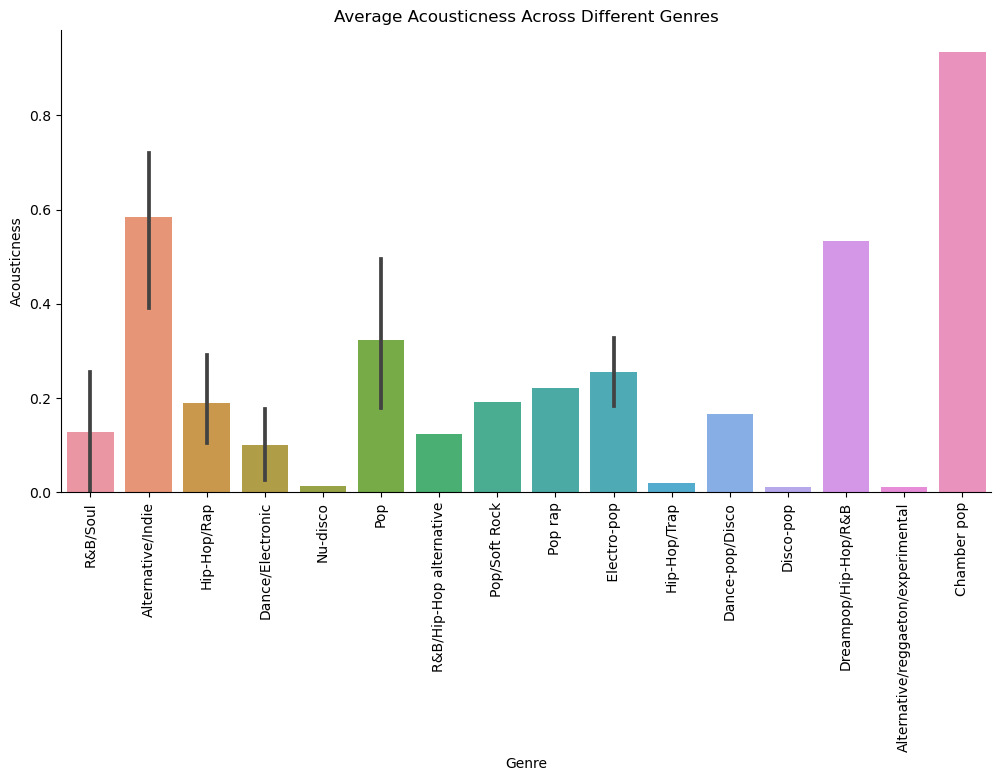

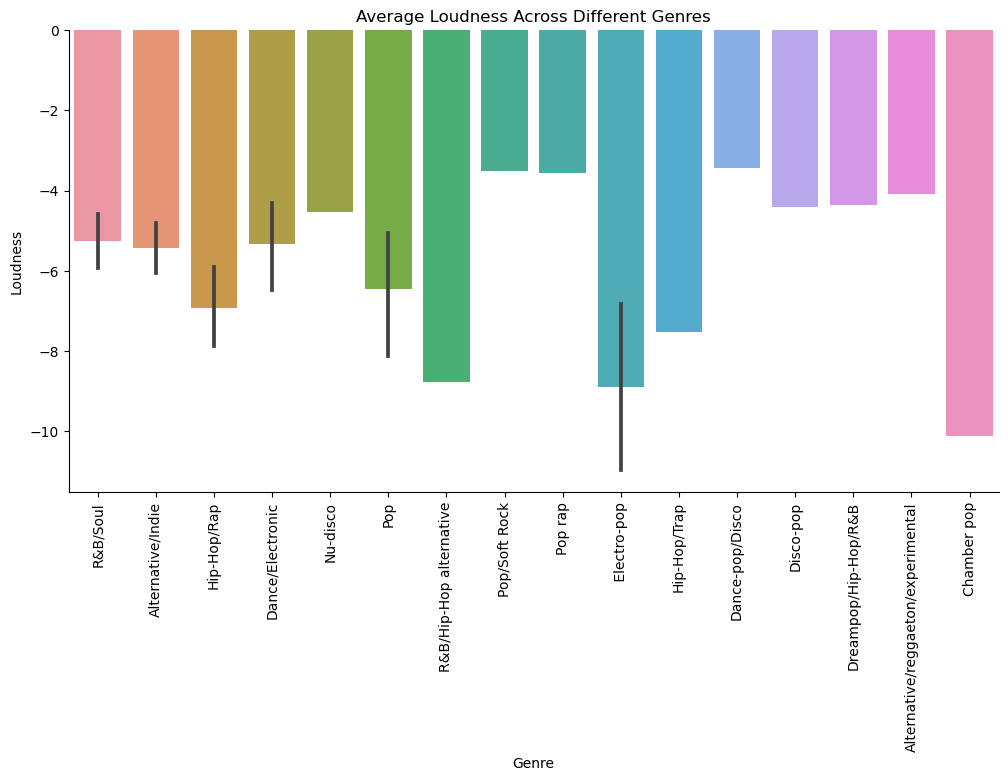

In [16]:
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='genre', y='acousticness', data=spotify_df)
plt.title('Average Acousticness Across Different Genres')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Acousticness')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='genre', y='loudness', data=spotify_df)
plt.title('Average Loudness Across Different Genres')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Loudness')


ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

### 4. Absence of Strong Correlation Between Duration and Rank:

The duration of tracks varies widely across ranks, indicating that song length is not a decisive factor in chart performance. Producers and artists may have creative flexibility in determining song length without negatively impacting chart success.

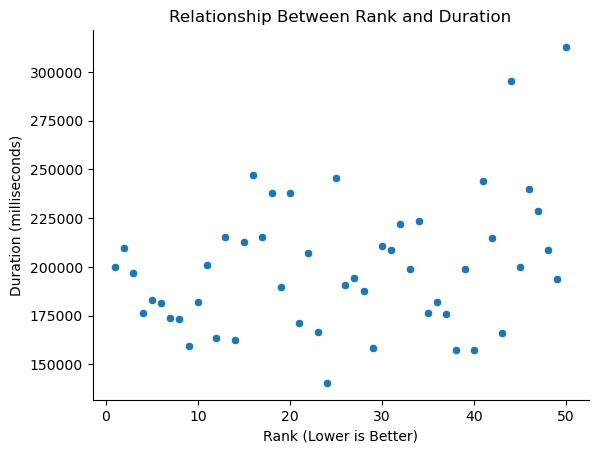

In [18]:
ax = sns.scatterplot(x='rank', y='duration_ms', data=spotify_df)
plt.title('Relationship Between Rank and Duration')
plt.xlabel('Rank (Lower is Better)')
plt.ylabel('Duration (milliseconds)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 5. Variability in Instrumentalness Among Top Tracks:

Most top tracks have low instrumentalness, but there is a wide range of scores. This suggests a balance between vocal and instrumental elements could cater to diverse tastes and resonate with a broad audience.

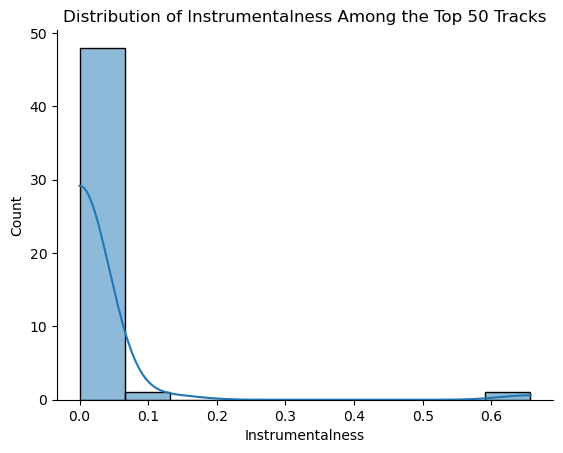

In [19]:
ax = sns.histplot(spotify_df['instrumentalness'], bins=10, kde=True)
plt.title('Distribution of Instrumentalness Among the Top 50 Tracks')
plt.xlabel('Instrumentalness')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Want to get a song in the top 50?

> Please note that these recommendations are based entirely on this particuar dataset and I am not a music industry expert. 

> Based on the analysis of the top 50 tracks in this dataset, here are some insights and recommendations that a music producer could consider to improve their chances of having a song land in the top 50:

### 1. Focus on Danceability and Energy

> Many of the top-ranked songs have higher danceability and energy scores. Creating tracks that are upbeat and suitable for dancing may appeal to a broader audience.

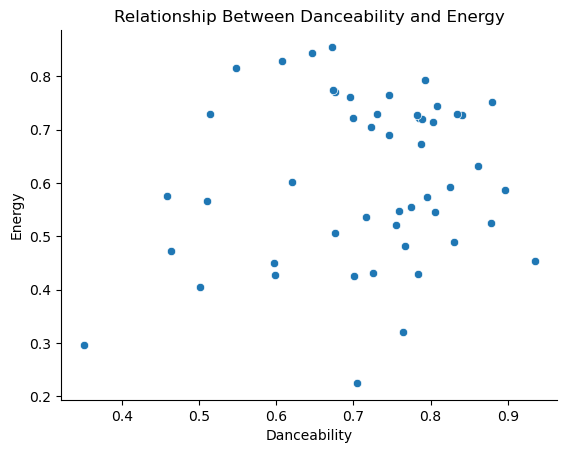

In [3]:
ax = sns.scatterplot(x='danceability', y='energy', data=spotify_df)
plt.title('Relationship Between Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 2. Consider Loudness

> The dataset shows that louder tracks tend to rank higher. Crafting a song with a strong and vibrant sound profile may increase its appeal.

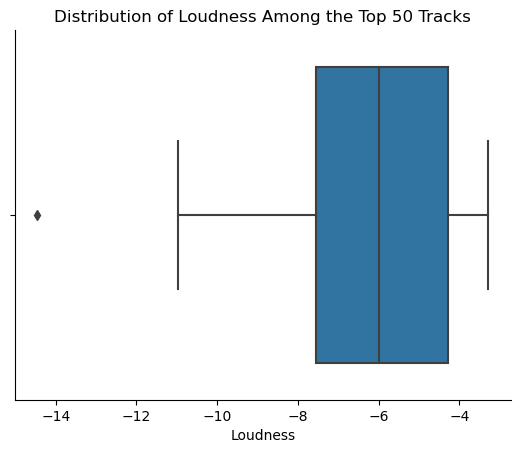

In [5]:
ax = sns.boxplot(x=spotify_df['loudness'])
plt.title('Distribution of Loudness Among the Top 50 Tracks')
plt.xlabel('Loudness')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 3. Limit Instrumental Elements

> Most top-ranked songs have low instrumentalness scores. While some instrumental elements can add depth, overly complex or purely instrumental tracks may not align with current popular tastes.

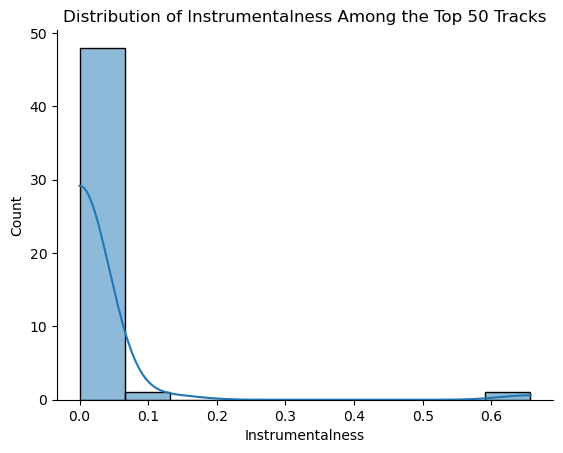

In [10]:
ax = sns.histplot(spotify_df['instrumentalness'], bins=10, kde=True)
plt.title('Distribution of Instrumentalness Among the Top 50 Tracks')
plt.xlabel('Instrumentalness')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 4. Explore Popular Genres

> Genres like "Pop," "Dance-pop," and "Hip-Hop" are well-represented in the top 50. Creating music within these popular genres or incorporating their elements could enhance the track's appeal.

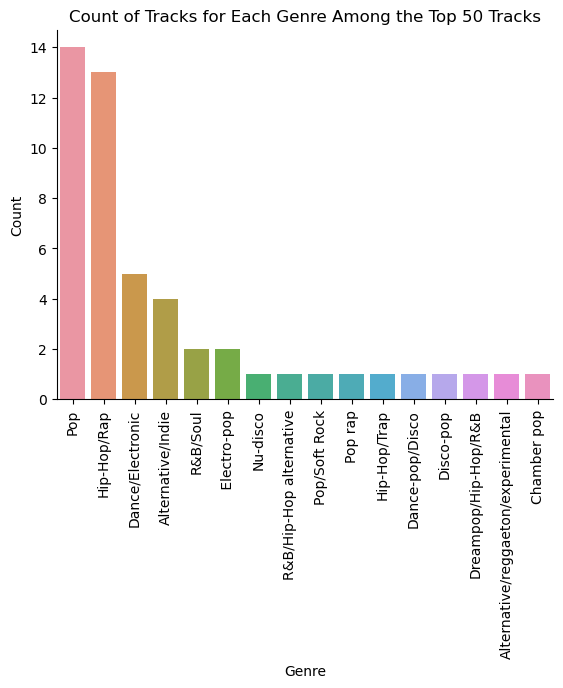

In [11]:
genre_counts = spotify_df['genre'].value_counts()
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Count of Tracks for Each Genre Among the Top 50 Tracks')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.xticks(rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()